<a href="https://colab.research.google.com/github/luctiz/Grupo43-TP1/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **00 - [START]Dependencias**

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install geopandas

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point, Polygon
import folium,json
from mpl_toolkits.basemap import Basemap

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **00 - [START] Validación de Datos**

In [0]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [0]:
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [0]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [0]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

In [10]:
print('Numero de columnas',df.shape)

Numero de columnas (240000, 23)


In [11]:
print('Numero de filas por columnas',df.size)

Numero de filas por columnas 5520000


In [12]:
print('Numero de Elementos',df.count())

Numero de Elementos id                            240000
titulo                        240000
descripcion                   240000
tipodepropiedad               240000
direccion                     240000
ciudad                        240000
provincia                     240000
antiguedad                    240000
habitaciones                  240000
garages                       240000
banos                         240000
metroscubiertos               240000
metrostotales                 240000
idzona                        240000
lat                           240000
lng                           240000
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64


In [13]:
print('Analisis de tipos',df.dtypes)

Analisis de tipos id                                     int32
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                                object
provincia                             object
antiguedad                             int32
habitaciones                           int32
garages                                int32
banos                                  int32
metroscubiertos                        int32
metrostotales                          int32
idzona                                 int32
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                               int32
usosmultiples                          int32
piscina                                int32
escuelascercanas                       int32
centroscomercialescercanos           

In [14]:
#Se redujo el uso de memoria de 45MB a 27MB aproximadamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int32
titulo                        240000 non-null object
descripcion                   240000 non-null object
tipodepropiedad               240000 non-null category
direccion                     240000 non-null object
ciudad                        240000 non-null object
provincia                     240000 non-null object
antiguedad                    240000 non-null int32
habitaciones                  240000 non-null int32
garages                       240000 non-null int32
banos                         240000 non-null int32
metroscubiertos               240000 non-null int32
metrostotales                 240000 non-null int32
idzona                        240000 non-null int32
lat                           240000 non-null float64
lng                           240000 non-null float64
fecha                         240000 non-null

# **01 - [COORDENADAS] Análisis de Coordenadas**

In [0]:
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max

In [0]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sns.set(style="white", color_codes=True)

In [0]:
df = df.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son

In [0]:
# Creamos la lista de latitudes y longitudes.
lats, lons = list(df['lat']), list(df['lng'])

In [0]:
precios = list(df['precio'])

In [0]:
lat = 23
lon = -102

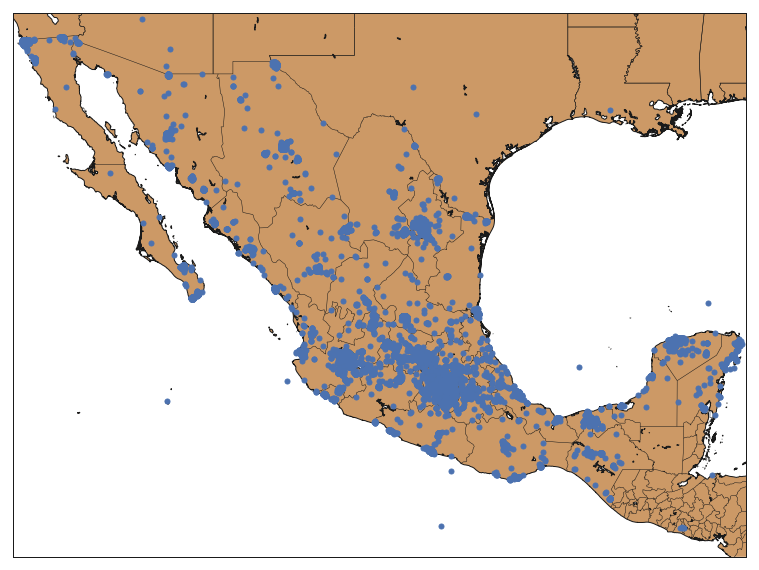

In [30]:
##Analizo sobre Mexico todas las publicaciones
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='merc',
                  lat_0 = 23, lon_0 = -102,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = '#cc9966')
eq_map.drawmapboundary()
eq_map.drawstates()

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'o', markersize=5)

plt.show()

# **2.1 - [PRECIOS] Análisis de Tipo de Propiedades VS Precio**

In [15]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
0                                    46
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1


In [0]:
result = df.groupby(["tipodepropiedad"])['precio'].aggregate(np.median).reset_index().sort_values('precio')

In [17]:
result.head()

,tipodepropiedad,precio
9,Garage,500000
7,Duplex,668000
15,Lote,702100
21,Terreno,1100000
0,0,1497500


In [0]:
result = result.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son (NO me sirven para comparar porque puede ser cualquier cosa)

Text(0, 0.5, 'Tipo de Propiedad')

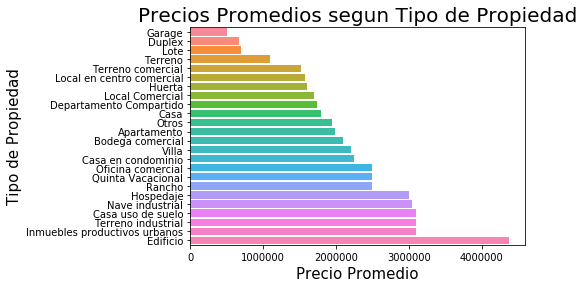

In [19]:
g = sns.barplot( x='precio', y= 'tipodepropiedad', data = result, order=result['tipodepropiedad'], orient = 'h',saturation = 1000)
g.set_title("Precios Promedios segun Tipo de Propiedad", fontsize=20)
g.set_xlabel("Precio Promedio", fontsize=15)
g.set_ylabel("Tipo de Propiedad", fontsize=15)

# **2.2 - [PRECIOS] Tipo de Propiedades vs popularidad por provincias y precios**

In [0]:
# Veo cuales son las propiedades más populares
propiedadesXtipos = df.tipodepropiedad.value_counts().nlargest(10)

In [0]:
tipos_populares = propiedadesXtipos.index

#Provincias más populares
popiedadesXprovincia = df.provincia.value_counts().nlargest(10)

In [0]:
provincias_populares = popiedadesXprovincia.index

In [0]:
#Tipo de propiedad vs precios promedios
tipoVSprecio = df[['id', 'tipodepropiedad', 'precio', 'provincia']].groupby(['provincia', 'tipodepropiedad']).agg({'id': 'count', 'precio': 'mean'}).reset_index().sort_values(by = ['id'], ascending = False)
#Tomo sólo los 10 tipos de propiedad y provincias más populares
tipoVSprecio_mas = tipoVSprecio.loc[(tipoVSprecio.provincia.isin(provincias_populares)) & (tipoVSprecio.tipodepropiedad.isin(tipos_populares))]

In [41]:
tablaHeatMap = pd.pivot_table(tipoVSprecio_mas, values = 'precio', index = 'tipodepropiedad', columns = 'provincia')
tablaHeatMap



provincia,Distrito Federal,Edo. de México,Jalisco,Morelos,Nuevo León,Puebla,Querétaro,San luis Potosí,Veracruz,Yucatán
tipodepropiedad,,,,,,,,,,
Apartamento,2.919103e+06,2.881501e+06,2.520902e+06,1.574236e+06,3.860282e+06,1.860751e+06,1.945329e+06,1.671470e+06,1.940036e+06,2.336429e+06
Bodega comercial,4.272932e+06,2.749083e+06,2.310573e+06,2.480000e+06,2.233120e+06,2.482700e+06,2.013162e+06,2.001956e+06,1.856329e+06,1.541557e+06
Casa,4.037017e+06,2.792133e+06,2.325363e+06,2.595663e+06,2.568358e+06,2.391779e+06,2.309959e+06,2.032427e+06,1.921550e+06,1.992796e+06
Casa en condominio,4.811713e+06,2.484096e+06,2.627604e+06,1.801653e+06,2.701284e+06,2.692794e+06,2.120155e+06,2.266716e+06,1.488363e+06,2.633705e+06
Casa uso de suelo,5.321922e+06,3.135521e+06,2.729746e+06,3.292401e+06,2.585438e+06,2.668182e+06,3.235852e+06,2.444000e+06,3.675000e+06,2.488077e+06
Edificio,5.951535e+06,4.820201e+06,4.911477e+06,3.938667e+06,3.617602e+06,4.947077e+06,4.353530e+06,5.465400e+06,3.963292e+06,3.272906e+06
Local Comercial,3.178273e+06,2.764283e+06,2.349532e+06,2.512158e+06,2.440365e+06,2.293458e+06,1.898338e+06,2.032394e+06,2.521488e+06,2.081840e+06
Oficina comercial,3.647538e+06,3.334818e+06,3.837927e+06,2.064219e+06,3.231270e+06,2.708164e+06,2.277341e+06,1.888526e+06,2.696753e+06,1.945090e+06
Terreno,4.066719e+06,1.871082e+06,1.766575e+06,1.477136e+06,1.841704e+06,1.330743e+06,8.709473e+05,1.360701e+06,1.066838e+06,1.280037e+06


Text(0.5, 30.5, 'Provincia')

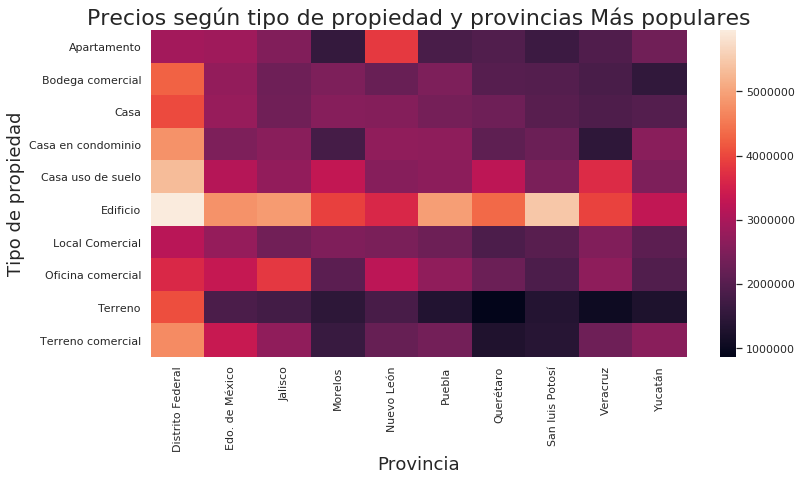

In [42]:
plt.figure(figsize = (12,6))
graf = sns.heatmap(tablaHeatMap)
graf.set_title('Precios según tipo de propiedad y provincias Más populares', fontsize =  22)
graf.set_ylabel('Tipo de propiedad', fontsize = 18)
graf.set_xlabel('Provincia', fontsize = 18)

# **2.3 - [PRECIOS] ¿Cómo se distribuye el precio en las ciudades más populares?**

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000.]),
 <a list of 9 Text yticklabel objects>)

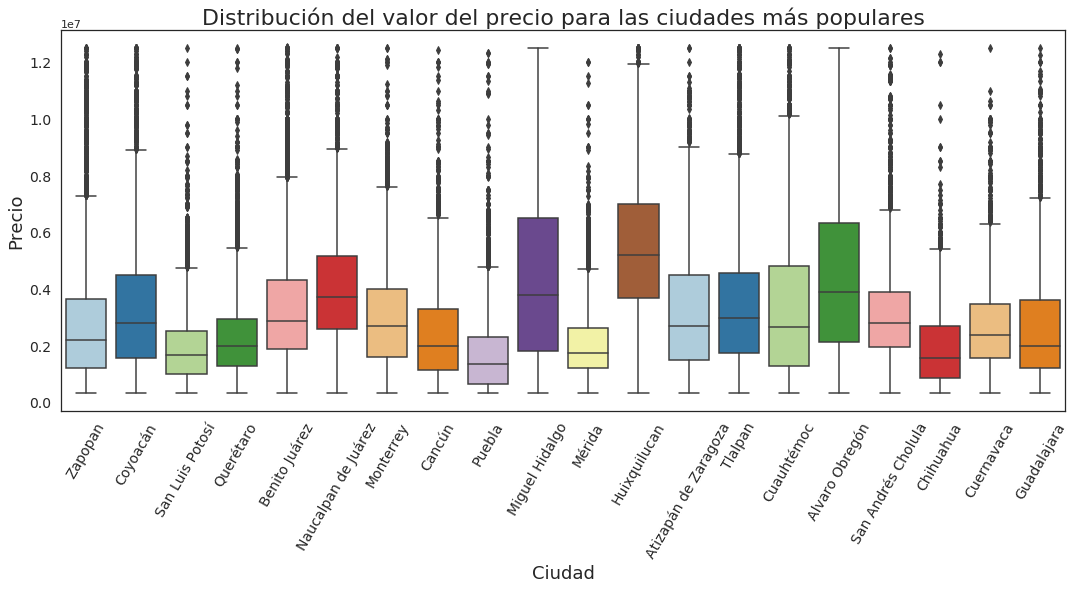

In [44]:
ciudades_populares = df.ciudad.value_counts().head(20).index
precios_ciudades_pop = df.loc[df.ciudad.isin(ciudades_populares), ['precio', 'ciudad']]
plt.figure(figsize = (18,7))
grafico = sns.boxplot( x=precios_ciudades_pop["ciudad"], y=precios_ciudades_pop["precio"], palette="Paired")
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=60)
grafico.set_title('Distribución del valor del precio para las ciudades más populares', fontsize =  22)
grafico.set_ylabel('Precio', fontsize = 18)
grafico.set_xlabel('Ciudad', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# **2.4 - [PRECIOS] ¿Qué pasa con el precio según las características de las casas?**

In [0]:
data_con_caracteristicas = df.dropna().iloc[:, [0,17,18,19,20,21,22]]
data_con_caracteristicas = data_con_caracteristicas.melt(id_vars = ['id', 'precio'], value_vars = ['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos'], var_name = 'caracteristica', value_name = 'si/no')

In [0]:
data_con_caracteristicas = data_con_caracteristicas.loc[data_con_caracteristicas['si/no'] != 0]

In [48]:
data_con_caracteristicas.groupby('caracteristica').agg({'id':'count', 'precio':'mean'})

,id,precio
caracteristica,,
centroscomercialescercanos,95168,2.605529e+06
escuelascercanas,106594,2.533698e+06
gimnasio,14994,3.814127e+06
piscina,20972,3.314903e+06
usosmultiples,13222,3.827091e+06


In [0]:
data_con_caracteristicas['cantidad'] = data_con_caracteristicas[['precio', 'caracteristica', 'si/no']].groupby(['precio', 'caracteristica']).transform(lambda x: x.sum())

Text(0, 0.5, 'Cantidad de Publicaciones')

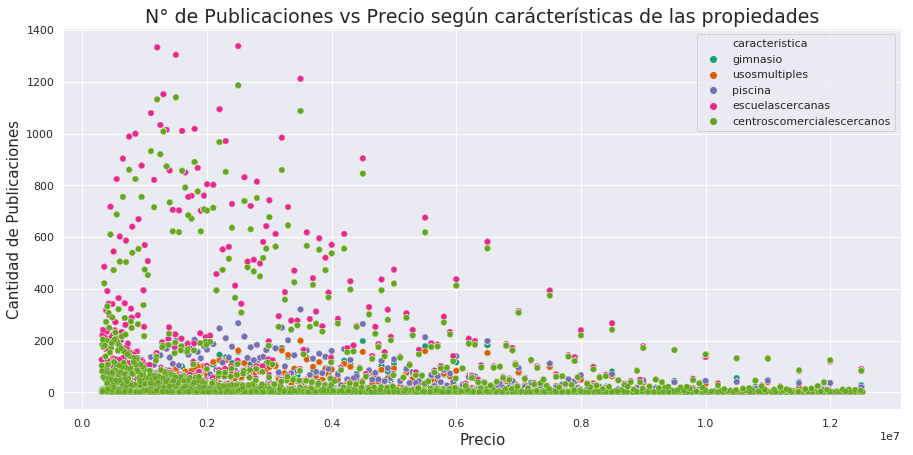

In [51]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="precio", y="cantidad",
                hue="caracteristica",
                palette="Dark2", linewidth=0.25,
                data=data_con_caracteristicas, ax=ax, alpha = 0.75)
g.set_title('N° de Publicaciones vs Precio según carácterísticas de las propiedades', fontsize = 19)
g.set_xlabel('Precio', fontsize = 15)
g.set_ylabel('Cantidad de Publicaciones', fontsize = 15)

**Conclusión Parcial**

Vemos como las propiedades con centros comerciales cercanos y con escuelas cercanas tienen un comportamiento bastante parecido, esto también se debe a que sean las más populares, pero además son cualidades importantes a la hora de decidir sobre la adquisición de una propiedad. Vemos que hay una poca cantidad de publicaciones con precios super variados, desde bajos hasta muy altos, pero a medida que la cantidad de publicaciones aumenta el precio comienza a disminuir, por lo que parecen ser mucho más populares las publicaciones de propiedades que posean éstas características y se encuentren a un precio relativamente bajo.

# 2.5 - [PRECIOS] Precios VS Antiguedad

In [0]:
precio_antiguedad = df[['precio', 'antiguedad', 'id']].loc[~(df.antiguedad.isnull())].groupby('antiguedad').agg({'precio': 'mean', 'id':'count'}).reset_index()

In [0]:
#Voy a filtrar las antiguedades que contengan menos de 100 publicaciones, así evitamos a la "ecuación más peligros del mundo"
precio_antiguedad = precio_antiguedad.loc[precio_antiguedad.id >= 100]

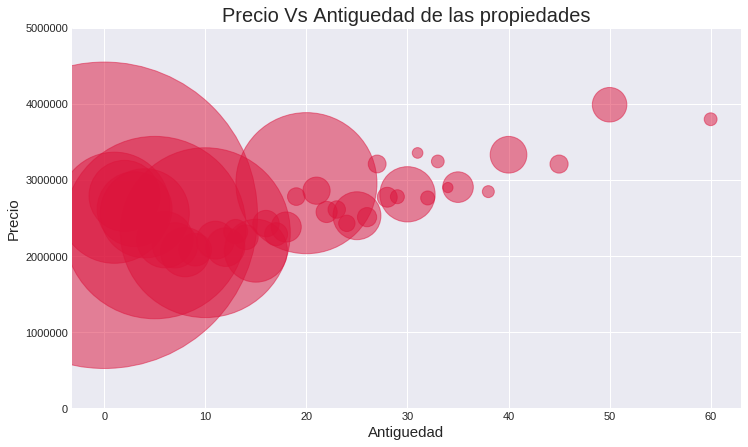

In [55]:
plt.figure(figsize = (12,7))
plt.style.use('seaborn-darkgrid')
plt.scatter(precio_antiguedad['antiguedad'], precio_antiguedad['precio'], s = precio_antiguedad['id'], color = 'crimson', alpha = 0.5)
plt.xlabel('Antiguedad', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.ylim(0,5000000)
plt.title('Precio Vs Antiguedad de las propiedades', fontsize = 20)
plt.show()

**Conclusión Parcial**

Vemos como las propiedades con una antiguedad entre 0 y 15 años tienen una grán cantidad de publicaciones registradas y precios mucho más variables que se encuentran por debajo de los 4.5 millones de pesos mexicanos, aunque si observamos bien, tenemos un aglutinamiento de propiedades que se encuentran por debajo de los 20 años de antiguedad, cuyo precio escala sólo un poco por encima de los 3 millones. Luego si nos movemos a propiedades que se encuentran entre los 15 años hasta casi los 30 años de antiguedad, el precio varía un poco menos, pues son menos publicaciones y se encuentran entre un rango de 2 a 3.5 millones de pesos mexicacnos. Por ultimo observamos como a medida que se superan los 30 años de antiguedad el precio va en aumento, vemos que hay ciertas propiedades rondando los 50 años de antiguedad y que son bastante costosas, así tambien vemos que el número de publicaciones disminuye, por lo que las casas con mayor antiguedad son menos populares entre las publicaciones.